# Linear Regression
### Alicia Brown

In [2]:
# Importacion de librerías y paquetes
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy.stats import norm
from sklearn import preprocessing
from random import random

import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#Leer los datos
# RegLin
data = pd.read_csv("https://raw.githubusercontent.com/ClaseML-2017/MaterialyTareas/master/datos/regLin.csv")

In [4]:
# RegLin2
data2 = pd.read_csv("https://raw.githubusercontent.com/ClaseML-2017/MaterialyTareas/master/datos/regLin2.csv")

In [5]:
# RegLin3
data3 = pd.read_csv("https://raw.githubusercontent.com/ClaseML-2017/MaterialyTareas/master/datos/regLin3.csv")

In [6]:
# Creación muestras de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(data[['X']], data[['y']], train_size=0.75)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [7]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(data2[['X']], data2[['y']], train_size=0.75)

In [8]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(data3[['X']], data3[['y']], train_size=0.75)

In [9]:
# Regresión de x sobre y
regr = linear_model.LinearRegression()
linreg = regr.fit(X_train, Y_train)
b0, b1 = linreg.intercept_, linreg.coef_

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [10]:
regr2 = linear_model.LinearRegression()
linreg2 = regr2.fit(X_train2, Y_train2)
b0_2, b1_2 = linreg2.intercept_, linreg2.coef_

In [11]:
regr3 = linear_model.LinearRegression()
linreg3 = regr3.fit(X_train3, Y_train3)
b0_3, b1_3= linreg3.intercept_, linreg3.coef_

In [12]:
# Intercepto y pendiente
print b0, b1, b0_2, b1_2, b0_3, b1_3

[ 2.76461052] [[ 0.6017575]] [-926.06680303] [[ 60.31484179]] [ 0.02335558] [[-0.00115997]]


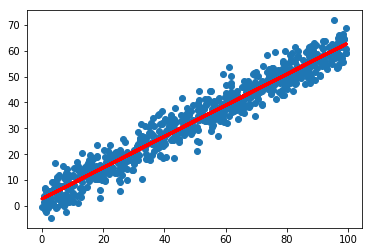

In [13]:
# Grafica de datos y el modelo ajustado para el primer archivo
plt.scatter(X_train, Y_train)
pred = regr.predict(X_train)
plt.plot(X_train,pred, color='red', linewidth=3)
plt.show()

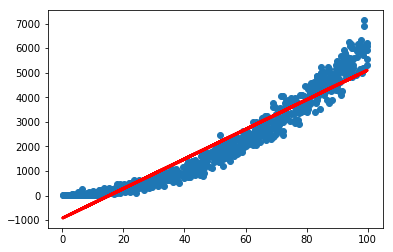

In [14]:
# Grafica de datos y el modelo ajustado para el segundo archivo
plt.scatter(X_train2, Y_train2)
pred2 = regr2.predict(X_train2)
plt.plot(X_train2,pred2, color='red', linewidth=3)
plt.show()


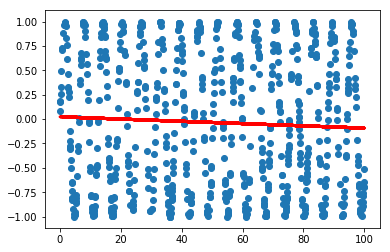

In [15]:
# Grafica de datos y el modelo ajustado para el tercer archivo
plt.scatter(X_train3, Y_train3)
pred3 = regr3.predict(X_train3)
plt.plot(X_train3,pred3, color='red', linewidth=3)
plt.show()

In [16]:
# Función del error de predicción
def calcError(X,y,w0,W):
    return np.mean((w0 + W*X.values- y.values)**2)

In [17]:
# Vectores de pesos
w_0 = np.linspace(float(b0-20),float(b0+20),len(X_test))
w_1 = np.linspace(float(b1-2),float(b1+2),len(X_test))

# Vector de errores con cambio en pesos en primer archivo
errores = calcError(X_test, Y_test, b0, b1) 

#Para w0
errores0 = [calcError(X_test, Y_test, w_0[i], b1) for i in range(0,len(w_0))]
#Para w1
errores1 = [calcError(X_test, Y_test, b0, w_1[i]) for i in range(0,len(w_1))]


In [18]:
# Vectores de pesos
w0_2 = np.linspace(float(b0_2-20),float(b0_2+20),len(X_test2))
w1_2 = np.linspace(float(b1_2-2),float(b1_2+2),len(X_test2))

# Vector de errores con cambio en pesos en segundo archivo
errores2 = calcError(X_test2, Y_test2, b0_2, b1_2) 

#Para w0
errores0_2 = [calcError(X_test2, Y_test2, w0_2[i], b1_2) for i in range(0,len(w0_2))]
#Para w1
errores1_2 = [calcError(X_test2, Y_test2, b0_2, w1_2[i]) for i in range(0,len(w1_2))]

In [19]:
# Vectores de pesos
w0_3 = np.linspace(float(b0_3-20),float(b0_3+20),len(X_test3))
w1_3 = np.linspace(float(b1_3-2),float(b1_3+2),len(X_test3))

# Vector de errores con cambio en pesos en tercer archivo
errores3 = calcError(X_test3, Y_test3, b0_3, b1_3) 

#Para w0
errores0_3 = [calcError(X_test3, Y_test3, w0_3[i], b1_3) for i in range(0,len(w0_3))]
#Para w1
errores1_3 = [calcError(X_test3, Y_test3, b0_3, w1_3[i]) for i in range(0,len(w1_3))]

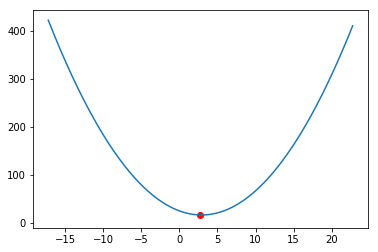

In [20]:
# Grafica w0 vs error de predicción para el primer archivo
plt.plot(w_0,errores0)
plt.scatter(b0, errores, color='red')
plt.show()

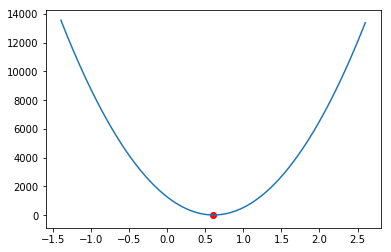

In [21]:
# Grafica w1 vs error de predicción para el primer archivo
plt.plot(w_1,errores1)
plt.scatter(b1, errores, color='red')
plt.show()

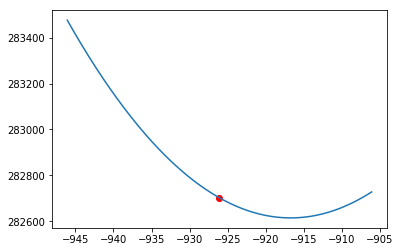

In [22]:
# Grafica w0 vs error de predicción para el segundo archivo
plt.plot(w0_2,errores0_2)
plt.scatter(b0_2, errores2, color='red')
plt.show()

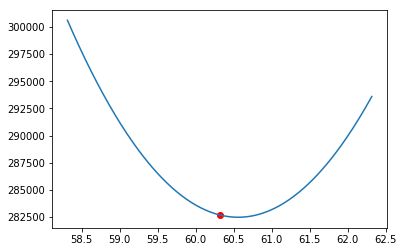

In [23]:
# Grafica w1 vs error de predicción para el segundo archivo
plt.plot(w1_2,errores1_2)
plt.scatter(b1_2, errores2, color='red')
plt.show()

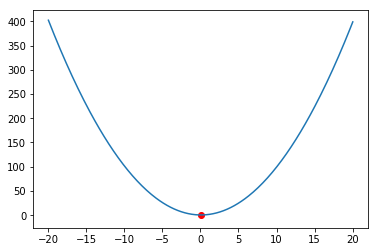

In [24]:
# Grafica w0 vs error de predicción para el tercer archivo
plt.plot(w0_3,errores0_3)
plt.scatter(b0_3, errores3, color='red')
plt.show()

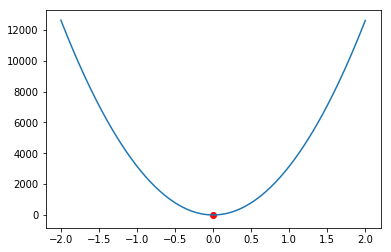

In [25]:
# Grafica w1 vs error de predicción para el tercer archivo
plt.plot(w1_3,errores1_3)
plt.scatter(b1_3, errores3, color='red')
plt.show()

# Aunque en todas las gráficas el valor de w0 y w1 provenientes de la regresión lineal
# minimiza el error cuadrático, en las gráficas de dispersión se puede notar que no es
# apropiado ajustar un modelo lineal, sin embargo se pueden hacer transformaciones.